## Chapter 02 데이터 다루기 ▶️수상한 생선을 조심하라!

### 02-1 훈련 세트와 테스트 세트 ▶️ 모델을 훈련 시키는 훈련 세트와 검증하는 테스트 세트로 나누어 학습하기 

In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [2]:
## data set 
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
fish_data = [[l,w] for l, w in zip(fish_length, fish_weight)] 
## 1~35번은 도미(1), 36~49번은 빙어(0)
fish_target = [1]*35 + [0]*14

In [4]:
fish_data[:5]

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]

In [5]:
fish_target[:5]

[1, 1, 1, 1, 1]

In [6]:
## train, test dataset 구분 
train_input = fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]

In [7]:
model = KNeighborsClassifier()
model.fit(train_input, train_target)
model.score(train_input, train_target)

1.0

In [8]:
model.score(test_input, test_target)

0.0

- train 과정에서 모델 정확도는 100% 였으나, test 과정에서는 정확도 0% 
- train dataset에 '빙어'에 대한 데이터가 없었기 때문, 샘플링 편향 발생 

In [9]:
## numpy로 데이터셋 생성하고, 랜덤샘플링 
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [10]:
print( input_arr.shape )
print( target_arr.shape )

(49, 2)
(49,)


In [11]:
index = np.arange(49)
np.random.shuffle(index)

index

array([40, 46, 10, 45, 21,  3, 11,  2, 12, 27,  4, 23, 43,  8,  1, 22, 34,
       16,  7,  5, 13, 18, 15, 47, 39, 26, 29, 35,  6, 19, 33, 17, 24, 14,
       20,  0, 25, 41,  9, 48, 38, 42, 28, 30, 44, 36, 32, 37, 31])

In [12]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

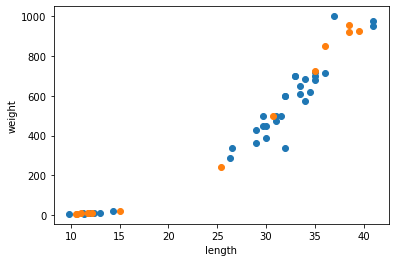

In [13]:
import matplotlib.pyplot as plt 

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [14]:
## 랜덤샘플링된 데이터셋(도미, 빙어가 골고루 섞인)으로 다시 모델학습 
model.fit(train_input, train_target)
model.score(test_input, test_target)

1.0

In [15]:
## 실제 값(test set)과 모형이 예측한 값을 비교해보자 
print( test_target ) 
print ('-------------------------------------------------------')
print( model.predict(test_input) )

[1 1 0 1 0 0 0 1 1 0 0 1 0 1]
-------------------------------------------------------
[1 1 0 1 0 0 0 1 1 0 0 1 0 1]


## 02-2 데이터 전처리 ▶️정교한 결과 도출을 위한 데이터 전처리 알아보기

In [16]:
## dataset 준비 
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [17]:
## numpy - column_stack, concatenate, ones, zeros를 활용하여 데이터셋 만들기 
fish_data = np.column_stack((fish_length, fish_weight))
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [18]:
## 사이킷런으로 tain/test datset 분리 (default = 25%를 test set으로 분리함)
from sklearn.model_selection import train_test_split 

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state = 42)

In [19]:
test_target

array([1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

- 원래 도미:빙어 = 35:14(2.5:1), 반면 사이킷런에 의해 분리된 샘플에서 도미:빙어 = 10:3(3.3:1) 
- train_test_split 에서 층화추출(stratify = fish_target) 옵션을 줘야 한다. 

In [20]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state = 42)
test_target

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [21]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(train_input, train_target)
model.score(test_input, test_target)

1.0

- 길이 24, 무게 150인 생선이 도미인지 빙어인지 모델을 사용해 예측해 보자 

In [22]:
model.predict([[24, 150]])

array([0.])

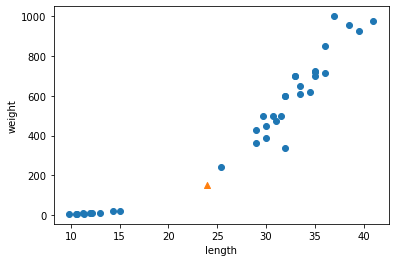

In [23]:
## 모델은 빙어로 판단했으나, 산점도 상에서 보면 도미에 가까워 보인다. x,y축의 scale이 다르기 때문이다. 
## 만약 x, y축을 동일 scale로 변환해서 본다면, x축의 점들간 거리는 y축 점들간 거리에 비해 움직임이 매우 미미한 수준으로 판단될 것이다. 
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(24, 150, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [30]:
## 데이터를 표준화 하라 (z-score : 값과 평균의 차이를 표준편차로 나누어 준다.)
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [25]:
train_scaled = (train_input - mean) / std
train_scaled.shape

(36, 2)

In [26]:
test_scaled = (test_input - mean) / std
test_scaled.shape

(13, 2)

In [27]:
## train/test에 사용되는 데이터를 모두 표준화된 것으로 사용해야 함 
model_2 = KNeighborsClassifier()
model_2.fit(train_scaled, train_target)
model_2.score(test_scaled, test_target)

1.0

In [28]:
## 새로운(예측대상) 생선의 길이와 무게도 표준화 해야 함 
new_fish_scaled = ([24, 150] - mean) / std 
new_fish_scaled

array([-0.33030215, -0.94060693])

In [29]:
model_2.predict([new_fish_scaled])

array([1.])

- (성공) 모델 정확도 100%, 길이 24 & 무게 150인 생선을 도미로 예측